## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [2]:
# Full Data
network_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_network_data.csv')
#network_data = network_data[network_data['topic_number'] != -1]
medicine_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_medicine_and_research_data.csv')
#medicine_data = medicine_data[medicine_data['topic_number'] != -1]
media_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_media_data.csv')
#media_data = media_data[media_data['topic_number'] != -1]

In [31]:
network_data[(network_data['Relationship_type'] == 'Tweet') & (network_data['love_results'] >= 0.5)]

,Vertex1,Vertex2,Relationship_type,Relationship Date (UTC),Tweet,Lang_code,Tweet Date (UTC),Tweet_ID,Conversation_ID,Author_ID,...,topic_number,topic_name,topic_words,topic_probabilities,sentiment_results,official_report_results,joyful_results,love_results,anger_results,sadness_results
31,r_h_ebright,r_h_ebright,Tweet,2020-12-01T01:24:27.000Z,"""Scott Atlas, President Trumps [sociopathic] a...",en,2020-12-01T01:24:27.000Z,1333582700758884352,1.333583e+18,47791337,...,189,189_resign_resignation_disgrace_mulvaney,resign - resignation - disgrace - mulvaney - a...,0.198566,0.298096,0.753588,0.023608,0.665507,0.373397,0.278221
61,eliowa,eliowa,Tweet,2020-12-01T04:17:16.000Z,"here in cold Iowa, the face warmers are quite ...",en,2020-12-01T04:17:16.000Z,1333626190939246592,1.333626e+18,95221142,...,2,2_mask_wear_cloth_surgical,mask - wear - cloth - surgical - fit - respira...,0.955815,0.971946,0.090577,0.218987,0.543996,0.044344,0.027619
96,peterhotez,peterhotez,Tweet,2020-12-01T11:52:49.000Z,Teachable moment: nice example of the sort of ...,en,2020-12-01T11:52:49.000Z,1333740835779850240,1.333741e+18,593289567,...,755,755_russian_extremist_weaponize_extremism,russian - extremist - weaponize - extremism - ...,1.000000,0.874591,0.475259,0.131998,0.801693,0.025825,0.020313
103,epstein_dan,epstein_dan,Tweet,2020-12-01T12:39:03.000Z,Interesting news story: Leaked documents revea...,en,2020-12-01T12:39:03.000Z,1333752469172740097,1.333752e+18,525813230,...,18,18_china_chinese_origin_chinas,china - chinese - origin - chinas - wuhan - mi...,1.000000,0.213503,0.937280,0.370461,0.657888,0.035943,0.061067
179,scottgottliebmd,scottgottliebmd,Tweet,2020-12-01T18:15:55.000Z,THREAD: Proud to have worked with my FDA team ...,en,2020-12-01T18:15:55.000Z,1333837245170802688,1.333837e+18,40156330,...,157,157_fda_drug_hhs_approval,fda - drug - hhs - approval - approve - pluto ...,0.568392,0.998351,0.275796,0.166721,0.584006,0.036700,0.069627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78865,epstein_dan,epstein_dan,Tweet,2022-02-23T19:13:22.000Z,Low vaccination coverage in many countries of ...,en,2022-02-23T19:13:22.000Z,1496563853672517640,1.496564e+18,525813230,...,278,278_caribbean_latin_paho_etienne,caribbean - latin - paho - etienne - carissa -...,1.000000,0.843421,0.854876,0.022813,0.505026,0.217441,0.185870
78875,drtedros,drtedros,Tweet,2022-02-23T19:39:10.000Z,Vaccines save lives. An effective and safe vac...,en,2022-02-23T19:39:10.000Z,1496570348459986960,1.496570e+18,189868631,...,56,56_malaria_tuberculosis_tb_endtb,malaria - tuberculosis - tb - endtb - endmalar...,0.614812,0.973172,0.138200,0.085743,0.875721,0.014620,0.077017
78879,ekemma,ekemma,Tweet,2022-02-23T20:02:41.000Z,Do not you just love mothers!,en,2022-02-23T20:02:41.000Z,1496576267562409986,1.496576e+18,33293133,...,77,77_mom_dad_daughter_father,mom - dad - daughter - father - fathers - uncl...,0.604051,0.516874,0.003191,0.061803,0.838782,0.476855,0.029899
78884,drtomfrieden,drtomfrieden,Tweet,2022-02-23T20:17:57.000Z,Vaccination remains our best defense against C...,en,2022-02-23T20:17:57.000Z,1496580109872025603,1.496580e+18,820452522494226433,...,-1,-1_pandemic_health_people_public,pandemic - health - people - public - get - wo...,0.000000,0.996412,0.328349,0.147276,0.595459,0.024221,0.045548


## Counting Sentiment Frequency

### Sizes of Individual Datasets

In [32]:
# The full size of the dataset to compare to
print(len(network_data))
print(len(medicine_data))
print(len(media_data))

78917
27952
1831


### Prominence of Each Emotion in Each Dataset

In [51]:
# The network dataset
network_positive_sent_count = network_data[network_data['sentiment_results'] >= 0.5].shape[0]
network_official_report_count = network_data[network_data['official_report_results'] >= 0.5].shape[0]
#network_joyful_count = network_data[(network_data['joyful_results'] >= 0.5) & (network_data['Relationship_type'] == 'Tweet')].shape[0]
#network_love_count = network_data[(network_data['love_results'] >= 0.5) & (network_data['Relationship_type'] == 'Tweet')].shape[0]
#network_anger_count = network_data[(network_data['anger_results'] >= 0.5) & (network_data['Relationship_type'] == 'Tweet')].shape[0]
#network_sadness_count = network_data[(network_data['sadness_results'] >= 0.5) & (network_data['Relationship_type'] == 'Tweet')].shape[0]
network_joyful_count = network_data[network_data['joyful_results'] >= 0.5].shape[0]
network_love_count = network_data[network_data['love_results'] >= 0.5].shape[0]
network_anger_count = network_data[network_data['anger_results'] >= 0.5].shape[0]
network_sadness_count = network_data[network_data['sadness_results'] >= 0.5].shape[0]

In [52]:
network_positive_sent_count

43398

In [53]:
network_official_report_count

17636

In [54]:
network_joyful_count

5531

In [55]:
network_love_count

14929

In [56]:
network_anger_count

5750

In [57]:
network_sadness_count

4905

In [58]:
# The medicine and medicine researcher dataset
medicine_positive_sent_count = medicine_data[medicine_data['sentiment_results'] >= 0.5].shape[0]
medicine_official_report_count = medicine_data[medicine_data['official_report_results'] >= 0.5].shape[0]
medicine_joyful_count = medicine_data[medicine_data['joyful_results'] >= 0.5].shape[0]
medicine_love_count = medicine_data[medicine_data['love_results'] >= 0.5].shape[0]
medicine_anger_count = medicine_data[medicine_data['anger_results'] >= 0.5].shape[0]
medicine_sadness_count = medicine_data[medicine_data['sadness_results'] >= 0.5].shape[0]

In [60]:
medicine_positive_sent_count

15985

In [61]:
medicine_official_report_count

4884

In [62]:
medicine_joyful_count

2215

In [63]:
medicine_love_count

5455

In [64]:
medicine_anger_count

2021

In [65]:
medicine_sadness_count

1696

In [59]:
# The media dataset
media_positive_sent_count = media_data[media_data['sentiment_results'] >= 0.5].shape[0]
media_official_report_count = media_data[media_data['official_report_results'] >= 0.5].shape[0]
media_joyful_count = media_data[media_data['joyful_results'] >= 0.5].shape[0]
media_love_count = media_data[media_data['love_results'] >= 0.5].shape[0]
media_anger_count = media_data[media_data['anger_results'] >= 0.5].shape[0]
media_sadness_count = media_data[media_data['sadness_results'] >= 0.5].shape[0]

In [66]:
media_positive_sent_count

976

In [67]:
media_official_report_count

1100

In [68]:
media_joyful_count

46

In [69]:
media_love_count

254

In [70]:
media_anger_count

71

In [71]:
media_sadness_count

118

## Analyse the Sentiments Over Time and During Key Periods

In [72]:
# The sentiments will be counted each month
# Each month will be related to a set of important events that occur
# So the sentiments can be put into that context

In [73]:
# Getting the Months
network_data['timestamp'] = pd.to_datetime(network_data['Tweet Date (UTC)'])
network_data['year_month'] = network_data['timestamp'].dt.to_period('M')

medicine_data['timestamp'] = pd.to_datetime(medicine_data['Tweet Date (UTC)'])
medicine_data['year_month'] = medicine_data['timestamp'].dt.to_period('M')

media_data['timestamp'] = pd.to_datetime(media_data['Tweet Date (UTC)'])
media_data['year_month'] = media_data['timestamp'].dt.to_period('M')

/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_67538/3899593066.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  network_data['year_month'] = network_data['timestamp'].dt.to_period('M')
/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_67538/3899593066.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  medicine_data['year_month'] = medicine_data['timestamp'].dt.to_period('M')
/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_67538/3899593066.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  media_data['year_month'] = media_data['timestamp'].dt.to_period('M')


In [74]:
# Getting the Number of Tweets per Month
network_data_months = network_data.groupby('year_month').size()
network_data_months_list = network_data_months.tolist()

medicine_data_months = medicine_data.groupby('year_month').size()
medicine_data_months_list = medicine_data_months.tolist()

media_data_months = media_data.groupby('year_month').size()
media_data_months_list = media_data_months.tolist()

In [92]:
network_positive_sent_df = network_data[network_data['sentiment_results'] >= 0.5]
network_positive_sent_per_month = network_positive_sent_df.groupby('year_month').size()
network_positive_sent_per_month_list = network_positive_sent_per_month.tolist()
network_positive_sent_per_month_percentage_list = [(network_positive_sent_per_month_list / network_data_months_list) * 100 for network_positive_sent_per_month_list, network_data_months_list in zip(network_positive_sent_per_month_list, network_data_months_list)]

network_official_report_df = network_data[network_data['official_report_results'] >= 0.5]
network_official_report_per_month = network_official_report_df.groupby('year_month').size()
network_official_report_per_month_list = network_official_report_per_month.tolist()
network_official_report_per_month_percentage_list = [(network_official_report_per_month_list / network_data_months_list) * 100 for network_official_report_per_month_list, network_data_months_list in zip(network_official_report_per_month_list, network_data_months_list)]

network_joyful_df = network_data[network_data['joyful_results'] >= 0.5]
network_joyful_per_month = network_joyful_df.groupby('year_month').size()
network_joyful_per_month_list = network_joyful_per_month.tolist()
network_joyful_per_month_percentage_list = [(network_joyful_per_month_list / network_data_months_list) * 100 for network_joyful_per_month_list, network_data_months_list in zip(network_joyful_per_month_list, network_data_months_list)]

network_love_df = network_data[network_data['love_results'] >= 0.5]
network_love_per_month = network_love_df.groupby('year_month').size()
network_love_per_month_list = network_love_per_month.tolist()
network_love_per_month_percentage_list = [(network_love_per_month_list / network_data_months_list) * 100 for network_love_per_month_list, network_data_months_list in zip(network_love_per_month_list, network_data_months_list)]

network_anger_df = network_data[network_data['anger_results'] >= 0.5]
network_anger_per_month = network_anger_df.groupby('year_month').size()
network_anger_per_month_list = network_anger_per_month.tolist()
network_anger_per_month_percentage_list = [(network_anger_per_month_list / network_data_months_list) * 100 for network_anger_per_month_list, network_data_months_list in zip(network_anger_per_month_list, network_data_months_list)]

network_sadness_df = network_data[network_data['sadness_results'] >= 0.5]
network_sadness_per_month = network_sadness_df.groupby('year_month').size()
network_sadness_per_month_list = network_sadness_per_month.tolist()
network_sadness_per_month_percentage_list = [(network_sadness_per_month_list / network_data_months_list) * 100 for network_sadness_per_month_list, network_data_months_list in zip(network_sadness_per_month_list, network_data_months_list)]

In [103]:
medicine_positive_sent_df = medicine_data[medicine_data['sentiment_results'] >= 0.5]
medicine_positive_sent_per_month = medicine_positive_sent_df.groupby('year_month').size()
medicine_positive_sent_per_month_list = medicine_positive_sent_per_month.tolist()
medicine_positive_sent_per_month_percentage_list = [(medicine_positive_sent_per_month_list / medicine_data_months_list) * 100 for medicine_positive_sent_per_month_list, medicine_data_months_list in zip(medicine_positive_sent_per_month_list, medicine_data_months_list)]

medicine_official_report_df = medicine_data[medicine_data['official_report_results'] >= 0.5]
medicine_official_report_per_month = medicine_official_report_df.groupby('year_month').size()
medicine_official_report_per_month_list = medicine_official_report_per_month.tolist()
medicine_official_report_per_month_percentage_list = [(medicine_official_report_per_month_list / medicine_data_months_list) * 100 for medicine_official_report_per_month_list, medicine_data_months_list in zip(medicine_official_report_per_month_list, medicine_data_months_list)]

medicine_joyful_df = medicine_data[medicine_data['joyful_results'] >= 0.5]
medicine_joyful_per_month = medicine_joyful_df.groupby('year_month').size()
medicine_joyful_per_month_list = medicine_joyful_per_month.tolist()
medicine_joyful_per_month_percentage_list = [(medicine_joyful_per_month_list / medicine_data_months_list) * 100 for medicine_joyful_per_month_list, medicine_data_months_list in zip(medicine_joyful_per_month_list, medicine_data_months_list)]

medicine_love_df = medicine_data[medicine_data['love_results'] >= 0.5]
medicine_love_per_month = medicine_love_df.groupby('year_month').size()
medicine_love_per_month_list = medicine_love_per_month.tolist()
medicine_love_per_month_percentage_list = [(medicine_love_per_month_list / medicine_data_months_list) * 100 for medicine_love_per_month_list, medicine_data_months_list in zip(medicine_love_per_month_list, medicine_data_months_list)]

medicine_anger_df = medicine_data[medicine_data['anger_results'] >= 0.5]
medicine_anger_per_month = medicine_anger_df.groupby('year_month').size()
medicine_anger_per_month_list = medicine_anger_per_month.tolist()
medicine_anger_per_month_percentage_list = [(medicine_anger_per_month_list / medicine_data_months_list) * 100 for medicine_anger_per_month_list, medicine_data_months_list in zip(medicine_anger_per_month_list, medicine_data_months_list)]

medicine_sadness_df = medicine_data[medicine_data['sadness_results'] >= 0.5]
medicine_sadness_per_month = medicine_sadness_df.groupby('year_month').size()
medicine_sadness_per_month_list = medicine_sadness_per_month.tolist()
medicine_sadness_per_month_percentage_list = [(medicine_sadness_per_month_list / medicine_data_months_list) * 100 for medicine_sadness_per_month_list, medicine_data_months_list in zip(medicine_sadness_per_month_list, medicine_data_months_list)]

In [110]:
media_positive_sent_df = media_data[media_data['sentiment_results'] >= 0.5]
media_positive_sent_per_month = media_positive_sent_df.groupby('year_month').size()
media_positive_sent_per_month_list = media_positive_sent_per_month.tolist()
media_positive_sent_per_month_percentage_list = [(media_positive_sent_per_month_list / media_data_months_list) * 100 for media_positive_sent_per_month_list, media_data_months_list in zip(media_positive_sent_per_month_list, media_data_months_list)]

media_official_report_df = media_data[media_data['official_report_results'] >= 0.5]
media_official_report_per_month = media_official_report_df.groupby('year_month').size()
media_official_report_per_month_list = media_official_report_per_month.tolist()
media_official_report_per_month_percentage_list = [(media_official_report_per_month_list / media_data_months_list) * 100 for media_official_report_per_month_list, media_data_months_list in zip(media_official_report_per_month_list, media_data_months_list)]

media_joyful_df = media_data[media_data['joyful_results'] >= 0.5]
media_joyful_per_month = media_joyful_df.groupby('year_month').size()
media_joyful_per_month_list = media_joyful_per_month.tolist()
media_joyful_per_month_percentage_list = [(media_joyful_per_month_list / media_data_months_list) * 100 for media_joyful_per_month_list, media_data_months_list in zip(media_joyful_per_month_list, media_data_months_list)]

media_love_df = media_data[media_data['love_results'] >= 0.5]
media_love_per_month = media_love_df.groupby('year_month').size()
media_love_per_month_list = media_love_per_month.tolist()
media_love_per_month_percentage_list = [(media_love_per_month_list / media_data_months_list) * 100 for media_love_per_month_list, media_data_months_list in zip(media_love_per_month_list, media_data_months_list)]

media_anger_df = media_data[media_data['anger_results'] >= 0.5]
media_anger_per_month = media_anger_df.groupby('year_month').size()
media_anger_per_month_list = media_anger_per_month.tolist()
media_anger_per_month_percentage_list = [(media_anger_per_month_list / media_data_months_list) * 100 for media_anger_per_month_list, media_data_months_list in zip(media_anger_per_month_list, media_data_months_list)]

media_sadness_df = media_data[media_data['sadness_results'] >= 0.5]
media_sadness_per_month = media_sadness_df.groupby('year_month').size()
media_sadness_per_month_list = media_sadness_per_month.tolist()
media_sadness_per_month_percentage_list = [(media_sadness_per_month_list / media_data_months_list) * 100 for media_sadness_per_month_list, media_data_months_list in zip(media_sadness_per_month_list, media_data_months_list)]

### Plotting the Sentiments and Emotions of Different Professions

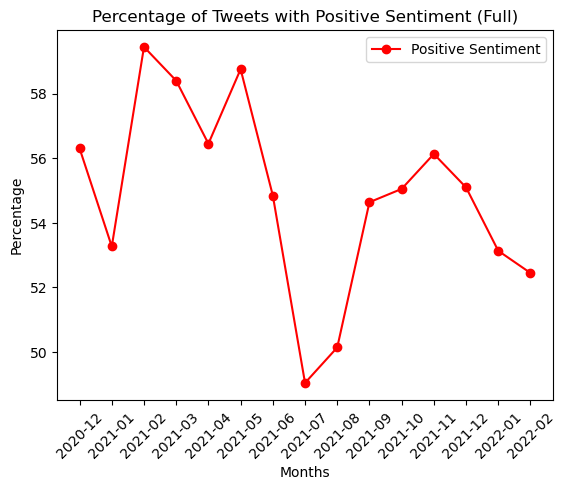

In [135]:
plt.plot(network_positive_sent_per_month_percentage_list, label='Positive Sentiment', color='r', linestyle='-', marker='o')
#plt.plot(network_official_report_per_month_percentage_list, label='Official Report', color='g', linestyle='--', marker='x')

x_ticks_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
months = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02']
plt.xticks(ticks=x_ticks_positions, labels=months, rotation=45)

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Positive Sentiment (Full)')
plt.legend()

plt.show()

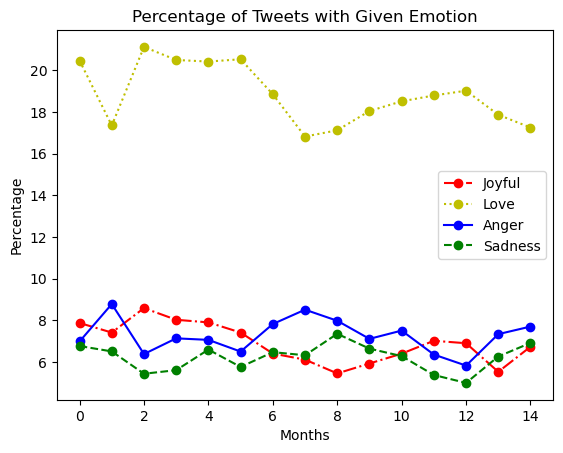

In [122]:
plt.plot(network_joyful_per_month_percentage_list, label='Joyful', color='r', linestyle='-.', marker='o')
plt.plot(network_love_per_month_percentage_list, label='Love', color='y', linestyle=':', marker='o')
plt.plot(network_anger_per_month_percentage_list, label='Anger', color='b', linestyle='-', marker='o')
plt.plot(network_sadness_per_month_percentage_list, label='Sadness', color='g', linestyle='--', marker='o')

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Given Emotion (Full)')
plt.legend()

plt.show()

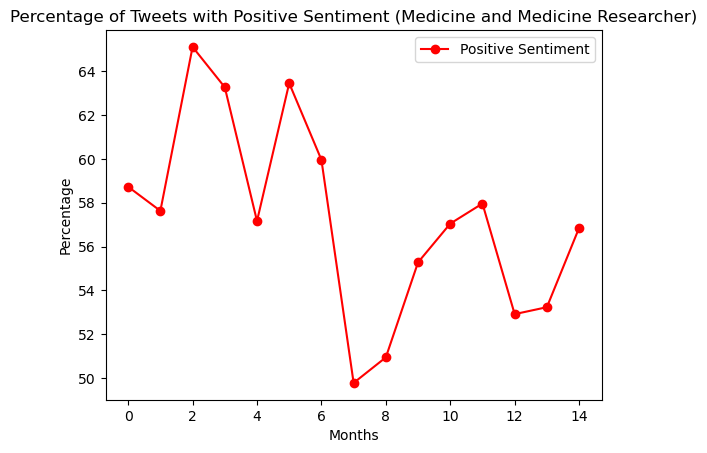

In [124]:
plt.plot(medicine_positive_sent_per_month_percentage_list, label='Positive Sentiment', color='r', linestyle='-', marker='o')
#plt.plot(network_official_report_per_month_percentage_list, label='Official Report', color='g', linestyle='--', marker='x')

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Positive Sentiment (Medicine and Medicine Researcher)')
plt.legend()

plt.show()

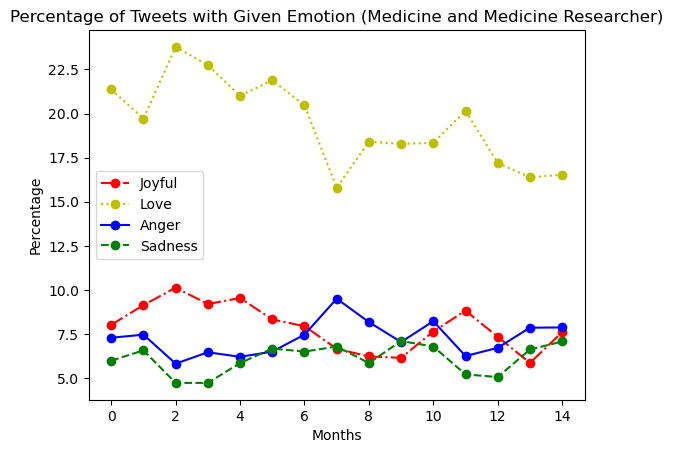

In [130]:
plt.plot(medicine_joyful_per_month_percentage_list, label='Joyful', color='r', linestyle='-.', marker='o')
plt.plot(medicine_love_per_month_percentage_list, label='Love', color='y', linestyle=':', marker='o')
plt.plot(medicine_anger_per_month_percentage_list, label='Anger', color='b', linestyle='-', marker='o')
plt.plot(medicine_sadness_per_month_percentage_list, label='Sadness', color='g', linestyle='--', marker='o')

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Given Emotion (Medicine and Medicine Researcher)')
plt.legend()

plt.show()

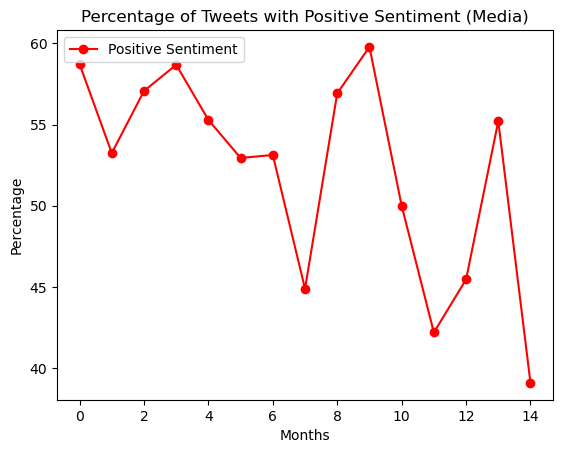

In [128]:
plt.plot(media_positive_sent_per_month_percentage_list, label='Positive Sentiment', color='r', linestyle='-', marker='o')
#plt.plot(network_official_report_per_month_percentage_list, label='Official Report', color='g', linestyle='--', marker='x')

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Positive Sentiment (Media)')
plt.legend()

plt.show()

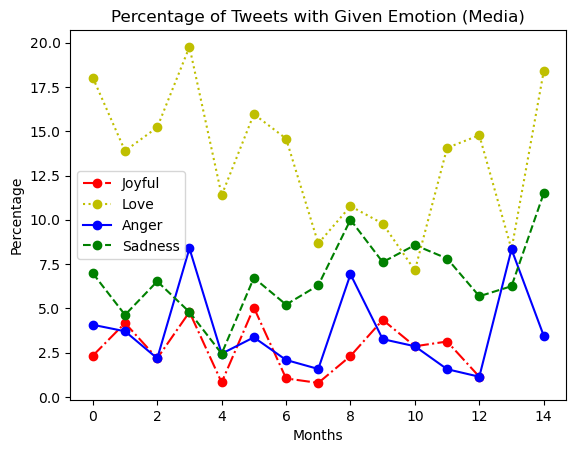

In [129]:
plt.plot(media_joyful_per_month_percentage_list, label='Joyful', color='r', linestyle='-.', marker='o')
plt.plot(media_love_per_month_percentage_list, label='Love', color='y', linestyle=':', marker='o')
plt.plot(media_anger_per_month_percentage_list, label='Anger', color='b', linestyle='-', marker='o')
plt.plot(media_sadness_per_month_percentage_list, label='Sadness', color='g', linestyle='--', marker='o')

plt.xlabel('Months')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets with Given Emotion (Media)')
plt.legend()

plt.show()

## Analyzing the Sentiments of High Frequency Topics

In [13]:
# Take the highly talked about topics, and plot their sentiment 

### Network Data

In [14]:
topics = network_data['topic_words'].value_counts()
topics_pruned = topics[1:].copy()

In [15]:
mean = np.mean(topics_pruned)
std_dev = np.std(topics_pruned)
std_index = (np.abs(topics_pruned - std_dev)).idxmin()
std_pos_index = topics_pruned.index.get_loc(std_index) * 2

In [16]:
# Inter-Quartile Range
top_perc = np.percentile(topics_pruned, 95)
bottom_perc = np.std(topics_pruned)
perc_range = top_perc - bottom_perc

# Find the indices of the closest values to the percentiles
top_index = (np.abs(topics_pruned - top_perc)).idxmin()
bottom_index = (np.abs(topics_pruned - std_dev)).idxmin()

# This is used to find the index of the last item in the Highly used topics
top_pos_index = topics_pruned.index.get_loc(top_index)

# This is used to find the index of the last item in the frequently used topics
bottom_pos_index = topics_pruned.index.get_loc(bottom_index) * 2

### Creating Dataset of highly and frequently talked about topics

In [17]:
highly_topics_pruned = topics_pruned[:top_pos_index]
frequently_topics_pruned = topics_pruned[top_pos_index:bottom_pos_index]

In [18]:
highly_topics_network_data = network_data[network_data['topic_words'].isin(highly_topics_pruned.index.tolist())]
frequently_topics_network_data = network_data[network_data['topic_words'].isin(frequently_topics_pruned.index.tolist())]

### Getting Sentiment Frequency

In [19]:
counted_cols = ['sentiment_results', 'official_report_results', 'joyful_results', 'love_results', 'anger_results', 'sadness_results']

highly_topics_network_data_binary = highly_topics_network_data[counted_cols].applymap(lambda x: 1 if x >= 0.5 else 0)
highly_topics_network_data_binary[['topic_words', 'year_month']] = highly_topics_network_data[['topic_words', 'year_month']]

frequently_topics_network_data_binary = frequently_topics_network_data[counted_cols].applymap(lambda x: 1 if x >= 0.5 else 0)
frequently_topics_network_data_binary[['topic_words', 'year_month']] = frequently_topics_network_data[['topic_words', 'year_month']]

In [20]:
highly_topics_network_data_binary_grouped_theme = highly_topics_network_data_binary.groupby('topic_words')[['sentiment_results', 'official_report_results', 'joyful_results', 'love_results', 'anger_results', 'sadness_results']].sum().reset_index()
frequently_topics_network_data_binary_grouped_theme = frequently_topics_network_data_binary.groupby('topic_words')[['sentiment_results', 'official_report_results', 'joyful_results', 'love_results', 'anger_results', 'sadness_results']].sum().reset_index()

In [21]:
highly_topics_network_data_binary_grouped_theme_counts = highly_topics_network_data_binary['topic_words'].value_counts().reset_index()
frequently_topics_network_data_binary_grouped_theme_counts = frequently_topics_network_data_binary['topic_words'].value_counts().reset_index()

In [22]:
highly_topics_network_data_binary_grouped_theme_counts = pd.merge(highly_topics_network_data_binary_grouped_theme, highly_topics_network_data_binary_grouped_theme_counts, on='topic_words')
frequently_topics_network_data_binary_grouped_theme_counts = pd.merge(frequently_topics_network_data_binary_grouped_theme, frequently_topics_network_data_binary_grouped_theme_counts, on='topic_words')

### Getting Sentiment Frequency Over Time

In [33]:
highly_topics_network_data_binary_month_grouped = highly_topics_network_data_binary.groupby(['year_month', 'topic_words'])[counted_cols].sum().reset_index()
highly_topics_network_data_binary_counts = highly_topics_network_data_binary.groupby(['year_month', 'topic_words']).size().reset_index(name='count')
highly_topics_network_data_binary_month_grouped = pd.merge(highly_topics_network_data_binary_month_grouped, highly_topics_network_data_binary_counts, on=['year_month', 'topic_words'])

frequently_topics_network_data_binary_month_grouped = frequently_topics_network_data_binary.groupby(['year_month', 'topic_words'])[counted_cols].sum().reset_index()
frequently_topics_network_data_binary_counts = frequently_topics_network_data_binary.groupby(['year_month', 'topic_words']).size().reset_index(name='count')
frequently_topics_network_data_binary_month_grouped = pd.merge(frequently_topics_network_data_binary_month_grouped, frequently_topics_network_data_binary_counts, on=['year_month', 'topic_words'])

## Analyzing the Sentiments of Themes

In [152]:
# Take the sentiments of the themes created and plot their sentiment

In [153]:
# Importing Data with the Relevant Themes
network_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_network_topics.xlsx')
medicine_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_medicine_topics.xlsx')
media_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_media_topics.xlsx')

In [154]:
# Combine the themes with the other data
full_network_organized_data = pd.merge(network_data, network_organized_data, on='topic_words', how='left')
full_medicine_organized_data = pd.merge(medicine_data, medicine_organized_data, on='topic_words', how='left')
full_media_organized_data = pd.merge(media_data, media_organized_data, on='topic_words', how='left')

In [155]:
counted_cols = ['sentiment_results', 'official_report_results', 'joyful_results', 'love_results', 'anger_results', 'sadness_results']

full_network_organized_data_binary = full_network_organized_data[counted_cols].applymap(lambda x: 1 if x >= 0.5 else 0)
full_network_organized_data_binary[['theme', 'sub-theme', 'year_month']] = full_network_organized_data[['theme', 'sub-theme', 'year_month']]

full_medicine_organized_data_binary = full_medicine_organized_data[counted_cols].applymap(lambda x: 1 if x >= 0.5 else 0)
full_medicine_organized_data_binary[['theme', 'sub-theme', 'year_month']] = full_medicine_organized_data[['theme', 'sub-theme', 'year_month']]

full_media_organized_data_binary = full_media_organized_data[counted_cols].applymap(lambda x: 1 if x >= 0.5 else 0)
full_media_organized_data_binary[['theme', 'sub-theme', 'year_month']] = full_media_organized_data[['theme', 'sub-theme', 'year_month']]

In [156]:
full_network_organized_data_grouped_theme = full_network_organized_data_binary.groupby(['theme', 'sub-theme'])[counted_cols].sum().reset_index()
full_medicine_organized_data_grouped_theme = full_medicine_organized_data_binary.groupby(['theme', 'sub-theme'])[counted_cols].sum().reset_index()
full_media_organized_data_grouped_theme = full_media_organized_data_binary.groupby(['theme', 'sub-theme'])[counted_cols].sum().reset_index()

In [157]:
full_network_theme_counts = full_network_organized_data.groupby(['theme', 'sub-theme']).size().reset_index(name='count')
full_medicine_theme_counts = full_medicine_organized_data.groupby(['theme', 'sub-theme']).size().reset_index(name='count')
full_media_theme_counts = full_media_organized_data.groupby(['theme', 'sub-theme']).size().reset_index(name='count')

In [158]:
full_network_organized_data_grouped_theme = pd.merge(full_network_organized_data_grouped_theme, full_network_theme_counts, on=['theme', 'sub-theme'])
full_medicine_organized_data_grouped_theme = pd.merge(full_medicine_organized_data_grouped_theme, full_medicine_theme_counts, on=['theme', 'sub-theme'])
full_media_organized_data_grouped_theme = pd.merge(full_media_organized_data_grouped_theme, full_media_theme_counts, on=['theme', 'sub-theme'])

### Analyzing the Sentiments of Themes Overtime

In [159]:
# Group by year_month and theme, then sum the binary values
full_network_organized_data_binary_month_grouped = full_network_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme'])[counted_cols].sum().reset_index()
full_network_organized_data_binary_month_theme_counts = full_network_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme']).size().reset_index(name='count')
full_network_organized_data_binary_month_grouped = pd.merge(full_network_organized_data_binary_month_grouped, full_network_organized_data_binary_month_theme_counts, on=['year_month', 'theme', 'sub-theme'])

full_medicine_organized_data_binary_month_grouped = full_medicine_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme'])[counted_cols].sum().reset_index()
full_medicine_organized_data_binary_month_theme_counts = full_medicine_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme']).size().reset_index(name='count')
full_medicine_organized_data_binary_month_grouped = pd.merge(full_medicine_organized_data_binary_month_grouped, full_medicine_organized_data_binary_month_theme_counts, on=['year_month', 'theme', 'sub-theme'])

full_media_organized_data_binary_month_grouped = full_media_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme'])[counted_cols].sum().reset_index()
full_media_organized_data_binary_month_theme_counts = full_media_organized_data_binary.groupby(['year_month', 'theme', 'sub-theme']).size().reset_index(name='count')
full_media_organized_data_binary_month_grouped = pd.merge(full_media_organized_data_binary_month_grouped, full_media_organized_data_binary_month_theme_counts, on=['year_month', 'theme', 'sub-theme'])

In [171]:
full_network_organized_data_binary_month_grouped[(full_network_organized_data_binary_month_grouped['year_month'] == '2021-07') & (full_network_organized_data_binary_month_grouped['count'] >= 10)]

,year_month,theme,sub-theme,sentiment_results,official_report_results,joyful_results,love_results,anger_results,sadness_results,count
645,2021-07,awareness,america,9,5,1,2,3,4,32
648,2021-07,awareness,canada,2,23,0,0,0,0,23
649,2021-07,awareness,cases,12,28,3,1,2,4,50
651,2021-07,awareness,death,12,33,3,1,2,16,52
653,2021-07,awareness,hiv,7,2,1,1,2,0,13
654,2021-07,awareness,longcovid,9,16,0,1,0,1,21
657,2021-07,awareness,racism,2,2,0,1,6,1,16
660,2021-07,children,infertility,6,6,0,4,0,2,12
661,2021-07,children,prevent,10,4,1,3,0,0,21
663,2021-07,children,schools,10,14,0,7,5,3,39


In [253]:
# Some factors in the growth in anger and sadness in July 2021 to August 2021
# Vaccine Hesitancy (Anger)
# Awareness Death (Anger & Sadness)
# Vaccine Equity (Sadness)
# Vaccine Support (Sadness)

selected_theme = 'mutation'
selected_sub_theme = 'delta'

filtered_data = full_network_organized_data_binary_month_grouped[
    (full_network_organized_data_binary_month_grouped['theme'] == selected_theme) &
    (full_network_organized_data_binary_month_grouped['sub-theme'] == selected_sub_theme)
]

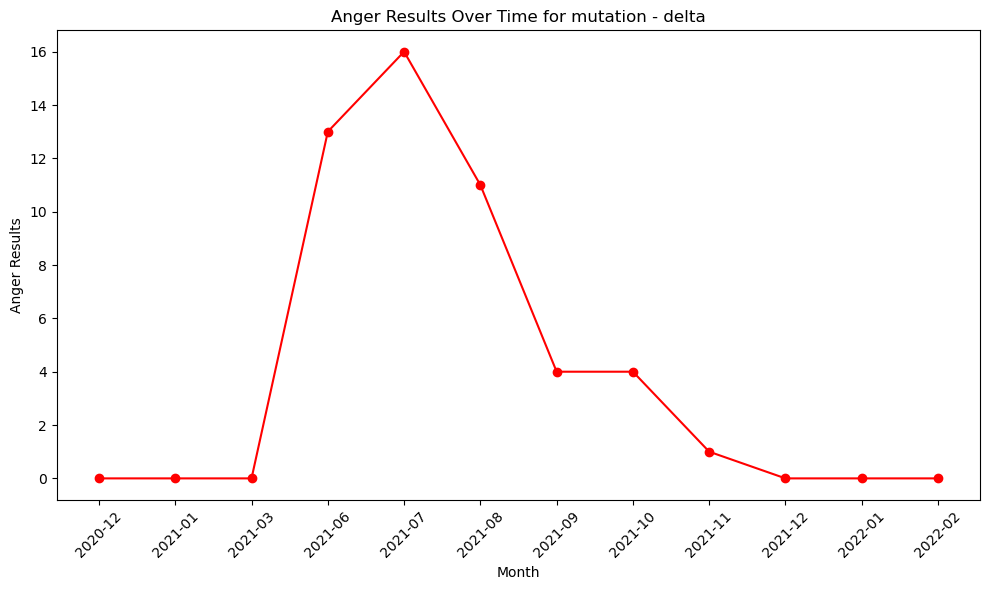

In [254]:
filtered_data = filtered_data.sort_values(by='year_month')

# Plot the 'anger_results' as a line chart
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['year_month'].astype(str), filtered_data['love_results'], marker='o', linestyle='-', color='r')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Anger Results')
plt.title(f'Anger Results Over Time for {selected_theme} - {selected_sub_theme}')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [198]:
theme_subtheme_stats = full_network_organized_data_binary_month_grouped.groupby(['theme', 'sub-theme']).agg({
    'sentiment_results': ['mean', 'std']
}).reset_index()

theme_subtheme_stats.columns = ['theme', 'sub-theme', 'mean_count', 'std_dev']

theme_subtheme_stats['cv'] = theme_subtheme_stats['std_dev'] / theme_subtheme_stats['mean_count']

theme_subtheme_stats_sorted = theme_subtheme_stats.sort_values(by='cv', ascending=False)

In [199]:
theme_subtheme_stats_sorted

,theme,sub-theme,mean_count,std_dev,cv
25,climate,america,0.166667,0.408248,2.449490
78,prevent,sweden,0.384615,0.869718,2.261268
48,mutation,omicron,30.800000,67.926641,2.205410
39,culture,wordle,5.571429,12.068486,2.166138
53,politics,afghanistan,4.250000,7.025464,1.653050
...,...,...,...,...,...
74,prevent,ppe,57.266667,20.810254,0.363392
73,prevent,natural_immunity,6.733333,2.404361,0.357083
91,twitter,relevant_words,23.466667,8.331238,0.355024
34,culture,food,21.600000,5.742075,0.265837
